# 6.1 매개 변수 갱신
- 최적화 : 손실 함수의 값을 가능한 한 낮추는 매개변수 찾아
    - 확률적 경사 하강법
    - 모멘텀
    - adagrad 학습률 감소
    - adam

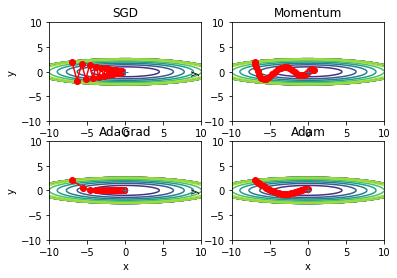

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import OrderedDict
from common.optimizer import *

def f(x, y):
    return x**2 / 20.0 + y**2

def df(x, y):
    return x / 10.0, 2.0*y

init_pos = (-7.0, 2.0)
params = {}
params['x'], params['y'] = init_pos[0], init_pos[1]
grads = {}
grads['x'], grads['y'] = 0, 0

optimizers = OrderedDict()
optimizers["SGD"] = SGD(lr=0.95)
optimizers["Momentum"] = Momentum(lr=0.1)
optimizers["AdaGrad"] = AdaGrad(lr=1.5)
optimizers["Adam"] = Adam(lr=0.3)

idx = 1

for key in optimizers:
    optimizer = optimizers[key]
    x_history = []
    y_history = []
    params['x'], params['y'] = init_pos[0], init_pos[1]

    for i in range(30):
        x_history.append(params['x'])
        y_history.append(params['y'])

        grads['x'], grads['y'] = df(params['x'], params['y'])
        optimizer.update(params, grads)

    x = np.arange(-10, 10, 0.01)
    y = np.arange(-5, 5, 0.01)

    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    # 외곽선 단순화
    mask = Z > 7
    Z[mask] = 0

    # 그래프 그리기
    plt.subplot(2, 2, idx)
    idx += 1
    plt.plot(x_history, y_history, 'o-', color="red")
    plt.contour(X, Y, Z)
    plt.ylim(-10, 10)
    plt.xlim(-10, 10)
    plt.plot(0, 0, '+')
    #colorbar()
    #spring()
    plt.title(key)
    plt.xlabel("x")
    plt.ylabel("y")

plt.show()

===========iteration:0===========
SGD:2.3519824736076456
Momentum:2.3585855896087926
AdaGrad:2.4780721103923167
Adam:2.2661263409214394
===========iteration:100===========
SGD:1.48023099701133
Momentum:0.29425187679370207
AdaGrad:0.14289042384312967
Adam:0.23097461316512377
===========iteration:200===========
SGD:0.7161784317665605
Momentum:0.24311755309690666
AdaGrad:0.09050322377599478
Adam:0.20366377787349682
===========iteration:300===========
SGD:0.4714566829110412
Momentum:0.2133544727294565
AdaGrad:0.06559184788419428
Adam:0.19244862253016848
===========iteration:400===========
SGD:0.429881366463419
Momentum:0.1816181593772765
AdaGrad:0.050184902075395735
Adam:0.0814689569212105
===========iteration:500===========
SGD:0.4352222614730635
Momentum:0.2735665180981763
AdaGrad:0.15056570734571684
Adam:0.2173145045470918
===========iteration:600===========
SGD:0.2748036610906789
Momentum:0.09631780392923178
AdaGrad:0.029819062232804547
Adam:0.04244742971522913
===========iteration:700

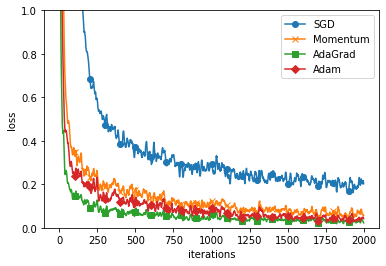

In [ ]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
%matplotlib inline
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0. MNIST 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

# 1. 실험을 위한 사전설정
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()
networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []

# 2. 훈련 시작
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

# 3. 그래프 그리기
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()

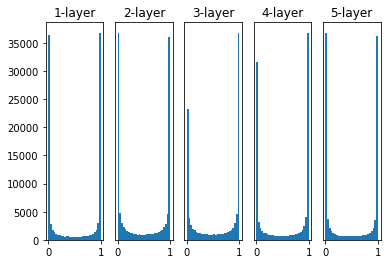

In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return np.maximum(0, x)

def tanh(x):
    return np.tanh(x)

input_data = np.random.randn(1000, 100)  # 1000개의 데이터
node_num = 100  # 각 은닉층의 노드(뉴런) 수
hidden_layer_size = 5  # 은닉층이 5개
activations = {}  # 이곳에 활성화 결과를 저장

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 초깃값 선택
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    # w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)

    a = np.dot(x, w)

    # 활성화 함수 선택
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# 히스토그램 그리기
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()

#6.2.3 relu 사용할 때 가중치 초깃값:
he 초깃값 : 모든 층 균일
        - 시그모이드 함수 활성화하면 xavier 초깃값이 좋음

#6.2.4 mnist 데이터셋으로 본 가중치 초기값 비교

===========iteration:0===========
std=0.01:2.3025609339458315
Xavier:2.3109628642908047
He:2.398088586705552
===========iteration:100===========
std=0.01:2.3030027331966707
Xavier:2.256264203510311
He:1.4787034124765688
===========iteration:200===========
std=0.01:2.301149007907152
Xavier:2.1720026279895115
He:0.7296760367574968
===========iteration:300===========
std=0.01:2.3013458231203816
Xavier:1.9699824072962784
He:0.4988192084059969
===========iteration:400===========
std=0.01:2.3010582469688745
Xavier:1.425586471339904
He:0.3255014983986996
===========iteration:500===========
std=0.01:2.30283967123391
Xavier:1.045147120186575
He:0.3196275714912684
===========iteration:600===========
std=0.01:2.3023793699131625
Xavier:0.8204345268960349
He:0.35456145319906185
===========iteration:700===========
std=0.01:2.2984558247433817
Xavier:0.5491500549572457
He:0.24414996092184657
===========iteration:800===========
std=0.01:2.305131387681126
Xavier:0.4843886158290787
He:0.26144640945397835

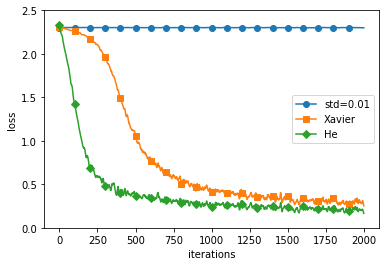

In [ ]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

# 0. MNIST 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)
train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

# 1. 실험용 설정
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)
networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []

# 2. 훈련 시작
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

# 3. 그래프 그리기==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

std 너무 작은 값 이어서 학습 안 됨
he 가 학습 진도 더 빠름


============== 1/16 ==============
epoch:0 | 0.117 - 0.092


C:\Users\jkimj\Ch 06\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\jkimj\Ch 06\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.089
epoch:2 | 0.097 - 0.11
epoch:3 | 0.097 - 0.129
epoch:4 | 0.097 - 0.137
epoch:5 | 0.097 - 0.16
epoch:6 | 0.097 - 0.179
epoch:7 | 0.097 - 0.197
epoch:8 | 0.097 - 0.21
epoch:9 | 0.097 - 0.208
epoch:10 | 0.097 - 0.245
epoch:11 | 0.097 - 0.249
epoch:12 | 0.097 - 0.264
epoch:13 | 0.097 - 0.297
epoch:14 | 0.097 - 0.316
epoch:15 | 0.097 - 0.342
epoch:16 | 0.097 - 0.35
epoch:17 | 0.097 - 0.369
epoch:18 | 0.097 - 0.393


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.398
============== 2/16 ==============
epoch:0 | 0.092 - 0.097


C:\Users\jkimj\Ch 06\common\multi_layer_net_extend.py:104: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
C:\Users\jkimj\Ch 06\common\multi_layer_net_extend.py:104: RuntimeWarning: invalid value encountered in double_scalars
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)


epoch:1 | 0.097 - 0.117
epoch:2 | 0.097 - 0.12
epoch:3 | 0.097 - 0.129
epoch:4 | 0.097 - 0.154
epoch:5 | 0.097 - 0.169
epoch:6 | 0.097 - 0.195
epoch:7 | 0.097 - 0.223
epoch:8 | 0.097 - 0.244
epoch:9 | 0.097 - 0.26
epoch:10 | 0.097 - 0.283
epoch:11 | 0.097 - 0.312
epoch:12 | 0.097 - 0.324
epoch:13 | 0.097 - 0.344
epoch:14 | 0.097 - 0.371
epoch:15 | 0.097 - 0.392
epoch:16 | 0.097 - 0.407
epoch:17 | 0.097 - 0.419
epoch:18 | 0.097 - 0.436


No handles with labels found to put in legend.


epoch:19 | 0.097 - 0.458
============== 3/16 ==============
epoch:0 | 0.103 - 0.095
epoch:1 | 0.298 - 0.116
epoch:2 | 0.438 - 0.154
epoch:3 | 0.563 - 0.198
epoch:4 | 0.635 - 0.242
epoch:5 | 0.675 - 0.273
epoch:6 | 0.725 - 0.327
epoch:7 | 0.763 - 0.37
epoch:8 | 0.801 - 0.409
epoch:9 | 0.831 - 0.45
epoch:10 | 0.842 - 0.481
epoch:11 | 0.873 - 0.505
epoch:12 | 0.895 - 0.527
epoch:13 | 0.912 - 0.554
epoch:14 | 0.923 - 0.574
epoch:15 | 0.933 - 0.6
epoch:16 | 0.948 - 0.619
epoch:17 | 0.96 - 0.635
epoch:18 | 0.963 - 0.65


No handles with labels found to put in legend.


epoch:19 | 0.97 - 0.66
============== 4/16 ==============
epoch:0 | 0.116 - 0.116
epoch:1 | 0.277 - 0.128
epoch:2 | 0.44 - 0.167
epoch:3 | 0.543 - 0.23
epoch:4 | 0.588 - 0.29
epoch:5 | 0.633 - 0.338
epoch:6 | 0.674 - 0.397
epoch:7 | 0.715 - 0.456
epoch:8 | 0.738 - 0.501
epoch:9 | 0.757 - 0.541
epoch:10 | 0.774 - 0.582
epoch:11 | 0.788 - 0.617
epoch:12 | 0.796 - 0.653
epoch:13 | 0.81 - 0.672
epoch:14 | 0.834 - 0.706
epoch:15 | 0.821 - 0.727
epoch:16 | 0.844 - 0.74
epoch:17 | 0.844 - 0.759
epoch:18 | 0.865 - 0.769


No handles with labels found to put in legend.


epoch:19 | 0.867 - 0.784
============== 5/16 ==============
epoch:0 | 0.136 - 0.09
epoch:1 | 0.132 - 0.119
epoch:2 | 0.141 - 0.24
epoch:3 | 0.145 - 0.383
epoch:4 | 0.153 - 0.499
epoch:5 | 0.154 - 0.574
epoch:6 | 0.159 - 0.647
epoch:7 | 0.168 - 0.696
epoch:8 | 0.18 - 0.731
epoch:9 | 0.189 - 0.762
epoch:10 | 0.2 - 0.783
epoch:11 | 0.222 - 0.797
epoch:12 | 0.23 - 0.815
epoch:13 | 0.246 - 0.829
epoch:14 | 0.243 - 0.833
epoch:15 | 0.248 - 0.846
epoch:16 | 0.255 - 0.856
epoch:17 | 0.262 - 0.863
epoch:18 | 0.27 - 0.867


No handles with labels found to put in legend.


epoch:19 | 0.278 - 0.873
============== 6/16 ==============
epoch:0 | 0.087 - 0.108
epoch:1 | 0.118 - 0.214
epoch:2 | 0.117 - 0.436
epoch:3 | 0.117 - 0.605
epoch:4 | 0.117 - 0.678
epoch:5 | 0.117 - 0.73
epoch:6 | 0.117 - 0.766
epoch:7 | 0.117 - 0.788
epoch:8 | 0.117 - 0.804
epoch:9 | 0.117 - 0.839
epoch:10 | 0.117 - 0.857
epoch:11 | 0.117 - 0.872
epoch:12 | 0.117 - 0.892
epoch:13 | 0.117 - 0.897
epoch:14 | 0.117 - 0.902
epoch:15 | 0.117 - 0.914
epoch:16 | 0.117 - 0.92
epoch:17 | 0.117 - 0.925
epoch:18 | 0.117 - 0.933


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.945
============== 7/16 ==============
epoch:0 | 0.117 - 0.097
epoch:1 | 0.12 - 0.297
epoch:2 | 0.117 - 0.533
epoch:3 | 0.117 - 0.695
epoch:4 | 0.117 - 0.775
epoch:5 | 0.116 - 0.819
epoch:6 | 0.116 - 0.86
epoch:7 | 0.116 - 0.889
epoch:8 | 0.116 - 0.91
epoch:9 | 0.116 - 0.916
epoch:10 | 0.116 - 0.927
epoch:11 | 0.174 - 0.935
epoch:12 | 0.116 - 0.937
epoch:13 | 0.117 - 0.95
epoch:14 | 0.117 - 0.957
epoch:15 | 0.117 - 0.966
epoch:16 | 0.117 - 0.97
epoch:17 | 0.117 - 0.976
epoch:18 | 0.117 - 0.978


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.982
============== 8/16 ==============
epoch:0 | 0.097 - 0.116
epoch:1 | 0.116 - 0.382
epoch:2 | 0.116 - 0.661
epoch:3 | 0.116 - 0.762
epoch:4 | 0.117 - 0.817
epoch:5 | 0.117 - 0.874
epoch:6 | 0.117 - 0.903
epoch:7 | 0.117 - 0.939
epoch:8 | 0.117 - 0.959
epoch:9 | 0.117 - 0.967
epoch:10 | 0.117 - 0.98
epoch:11 | 0.117 - 0.987
epoch:12 | 0.117 - 0.989
epoch:13 | 0.117 - 0.99
epoch:14 | 0.117 - 0.992
epoch:15 | 0.117 - 0.996
epoch:16 | 0.117 - 0.998
epoch:17 | 0.117 - 0.999
epoch:18 | 0.117 - 0.999


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.999
============== 9/16 ==============
epoch:0 | 0.117 - 0.103
epoch:1 | 0.116 - 0.628
epoch:2 | 0.116 - 0.755
epoch:3 | 0.116 - 0.811
epoch:4 | 0.116 - 0.87
epoch:5 | 0.116 - 0.932
epoch:6 | 0.116 - 0.954
epoch:7 | 0.117 - 0.978
epoch:8 | 0.117 - 0.987
epoch:9 | 0.117 - 0.99
epoch:10 | 0.117 - 0.993
epoch:11 | 0.117 - 0.994
epoch:12 | 0.117 - 0.996
epoch:13 | 0.116 - 0.997
epoch:14 | 0.116 - 0.996
epoch:15 | 0.117 - 0.998
epoch:16 | 0.116 - 0.999
epoch:17 | 0.117 - 0.999
epoch:18 | 0.117 - 0.999


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.999
============== 10/16 ==============
epoch:0 | 0.092 - 0.11
epoch:1 | 0.117 - 0.429
epoch:2 | 0.117 - 0.717
epoch:3 | 0.117 - 0.83
epoch:4 | 0.117 - 0.843
epoch:5 | 0.117 - 0.864
epoch:6 | 0.117 - 0.912
epoch:7 | 0.117 - 0.903
epoch:8 | 0.117 - 0.957
epoch:9 | 0.117 - 0.983
epoch:10 | 0.117 - 0.99
epoch:11 | 0.117 - 0.992
epoch:12 | 0.117 - 0.995
epoch:13 | 0.117 - 0.977
epoch:14 | 0.117 - 0.916
epoch:15 | 0.117 - 0.981
epoch:16 | 0.117 - 0.993
epoch:17 | 0.116 - 0.998
epoch:18 | 0.116 - 1.0


No handles with labels found to put in legend.


epoch:19 | 0.116 - 1.0
============== 11/16 ==============
epoch:0 | 0.116 - 0.126
epoch:1 | 0.117 - 0.649
epoch:2 | 0.117 - 0.72
epoch:3 | 0.116 - 0.648
epoch:4 | 0.116 - 0.764
epoch:5 | 0.116 - 0.791
epoch:6 | 0.117 - 0.778
epoch:7 | 0.117 - 0.791
epoch:8 | 0.116 - 0.791
epoch:9 | 0.116 - 0.889
epoch:10 | 0.116 - 0.882
epoch:11 | 0.116 - 0.924
epoch:12 | 0.116 - 0.939
epoch:13 | 0.116 - 0.969
epoch:14 | 0.116 - 0.966
epoch:15 | 0.116 - 0.983
epoch:16 | 0.117 - 0.948
epoch:17 | 0.117 - 0.988
epoch:18 | 0.117 - 0.986


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.983
============== 12/16 ==============
epoch:0 | 0.092 - 0.253
epoch:1 | 0.117 - 0.525
epoch:2 | 0.117 - 0.641
epoch:3 | 0.117 - 0.678
epoch:4 | 0.117 - 0.717
epoch:5 | 0.117 - 0.757
epoch:6 | 0.117 - 0.741
epoch:7 | 0.116 - 0.775
epoch:8 | 0.116 - 0.769
epoch:9 | 0.116 - 0.782
epoch:10 | 0.116 - 0.789
epoch:11 | 0.116 - 0.8
epoch:12 | 0.116 - 0.772
epoch:13 | 0.116 - 0.8
epoch:14 | 0.116 - 0.8
epoch:15 | 0.116 - 0.8
epoch:16 | 0.116 - 0.801
epoch:17 | 0.117 - 0.803
epoch:18 | 0.117 - 0.804


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.804
============== 13/16 ==============
epoch:0 | 0.116 - 0.176
epoch:1 | 0.117 - 0.363
epoch:2 | 0.117 - 0.517
epoch:3 | 0.117 - 0.59
epoch:4 | 0.117 - 0.6
epoch:5 | 0.117 - 0.604
epoch:6 | 0.117 - 0.614
epoch:7 | 0.117 - 0.673
epoch:8 | 0.117 - 0.677
epoch:9 | 0.117 - 0.674
epoch:10 | 0.117 - 0.674
epoch:11 | 0.117 - 0.63
epoch:12 | 0.117 - 0.691
epoch:13 | 0.117 - 0.687
epoch:14 | 0.117 - 0.708
epoch:15 | 0.117 - 0.688
epoch:16 | 0.117 - 0.705
epoch:17 | 0.117 - 0.704
epoch:18 | 0.117 - 0.716


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.711
============== 14/16 ==============
epoch:0 | 0.105 - 0.097
epoch:1 | 0.116 - 0.311
epoch:2 | 0.116 - 0.14
epoch:3 | 0.116 - 0.366
epoch:4 | 0.117 - 0.423
epoch:5 | 0.117 - 0.424
epoch:6 | 0.117 - 0.407
epoch:7 | 0.117 - 0.427
epoch:8 | 0.116 - 0.433
epoch:9 | 0.117 - 0.432
epoch:10 | 0.117 - 0.433
epoch:11 | 0.116 - 0.432
epoch:12 | 0.116 - 0.436
epoch:13 | 0.116 - 0.435
epoch:14 | 0.116 - 0.542
epoch:15 | 0.116 - 0.538
epoch:16 | 0.116 - 0.523
epoch:17 | 0.116 - 0.52
epoch:18 | 0.116 - 0.528


No handles with labels found to put in legend.


epoch:19 | 0.116 - 0.526
============== 15/16 ==============
epoch:0 | 0.117 - 0.123
epoch:1 | 0.117 - 0.363
epoch:2 | 0.116 - 0.422
epoch:3 | 0.116 - 0.494
epoch:4 | 0.117 - 0.357
epoch:5 | 0.117 - 0.495
epoch:6 | 0.117 - 0.456
epoch:7 | 0.117 - 0.502
epoch:8 | 0.117 - 0.433
epoch:9 | 0.117 - 0.436
epoch:10 | 0.117 - 0.513
epoch:11 | 0.117 - 0.495
epoch:12 | 0.117 - 0.514
epoch:13 | 0.117 - 0.515
epoch:14 | 0.117 - 0.529
epoch:15 | 0.117 - 0.529
epoch:16 | 0.117 - 0.528
epoch:17 | 0.117 - 0.53
epoch:18 | 0.117 - 0.527


No handles with labels found to put in legend.


epoch:19 | 0.117 - 0.522
============== 16/16 ==============
epoch:0 | 0.1 - 0.188
epoch:1 | 0.116 - 0.297
epoch:2 | 0.117 - 0.383
epoch:3 | 0.117 - 0.419
epoch:4 | 0.116 - 0.354
epoch:5 | 0.117 - 0.423
epoch:6 | 0.117 - 0.418
epoch:7 | 0.117 - 0.427
epoch:8 | 0.116 - 0.432
epoch:9 | 0.116 - 0.426
epoch:10 | 0.116 - 0.429
epoch:11 | 0.116 - 0.428
epoch:12 | 0.116 - 0.433
epoch:13 | 0.116 - 0.429
epoch:14 | 0.116 - 0.431
epoch:15 | 0.116 - 0.432
epoch:16 | 0.116 - 0.432
epoch:17 | 0.116 - 0.523
epoch:18 | 0.116 - 0.53
epoch:19 | 0.117 - 0.528


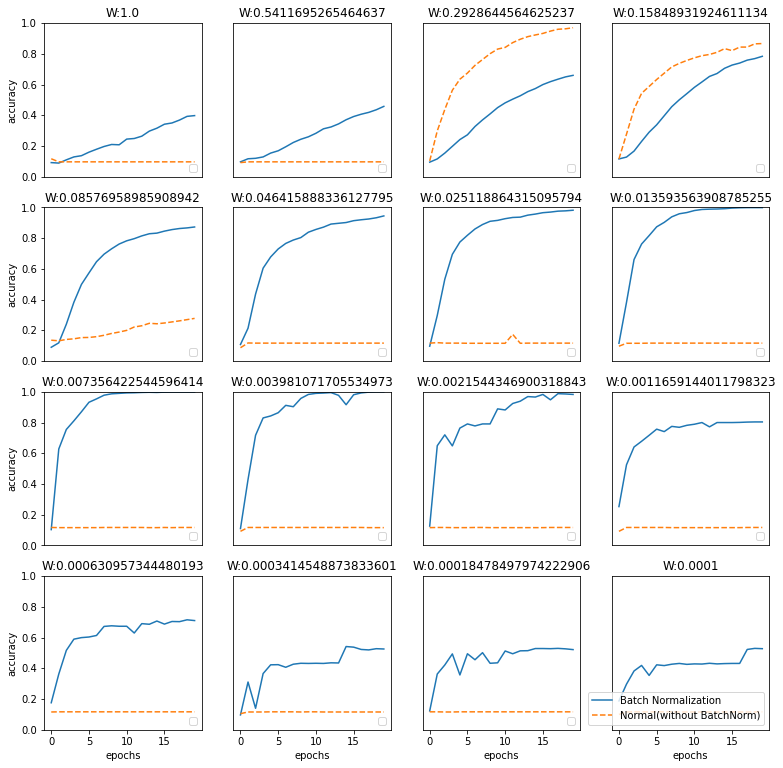

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

plt.rcParams["figure.figsize"] = (13, 13) # title이 겹쳐서 그래프 크기를 키웠음

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 학습 데이터를 줄임
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01

def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)

    train_acc_list = []
    bn_train_acc_list = []

    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0

    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)

            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))

            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break

    return train_acc_list, bn_train_acc_list


# 그래프 그리기
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)

    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')

plt.show()

# 6.4 바른 학습을 위해
오버피팅 의 문제


epoch:0, train acc:0.14, test acc:0.1255
epoch:1, train acc:0.13666666666666666, test acc:0.1294
epoch:2, train acc:0.16, test acc:0.136
epoch:3, train acc:0.19, test acc:0.1466
epoch:4, train acc:0.20333333333333334, test acc:0.1571
epoch:5, train acc:0.22, test acc:0.1671
epoch:6, train acc:0.23666666666666666, test acc:0.1695
epoch:7, train acc:0.26, test acc:0.1746
epoch:8, train acc:0.25666666666666665, test acc:0.179
epoch:9, train acc:0.27666666666666667, test acc:0.1864
epoch:10, train acc:0.3, test acc:0.189
epoch:11, train acc:0.31, test acc:0.2033
epoch:12, train acc:0.34, test acc:0.2027
epoch:13, train acc:0.3466666666666667, test acc:0.2024
epoch:14, train acc:0.36, test acc:0.2157
epoch:15, train acc:0.37333333333333335, test acc:0.2257
epoch:16, train acc:0.39666666666666667, test acc:0.2381
epoch:17, train acc:0.4166666666666667, test acc:0.2439
epoch:18, train acc:0.43666666666666665, test acc:0.2464
epoch:19, train acc:0.45666666666666667, test acc:0.2583
epoch:20, t

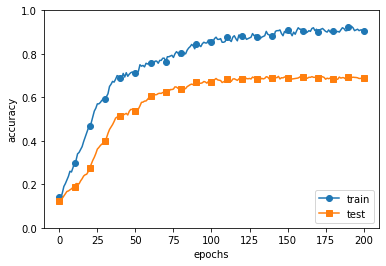

In [ ]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01) # 학습률이 0.01인 SGD로 매개변수 갱신

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [ ]:
6.4.2 가중치 감소 : 가중체 제곱 노름을 손실 함수에 더해
6.4.3 드롭아웃 : 뉴런을 임의로 삭제하면서 학습

train loss:2.2919431102941132
=== epoch:1, train acc:0.09666666666666666, test acc:0.0963 ===
train loss:2.322061539993424
train loss:2.3026482458672346
train loss:2.332488817229961
=== epoch:2, train acc:0.09, test acc:0.0965 ===
train loss:2.2921877430138733
train loss:2.3186899872465823
train loss:2.2985349936162875
=== epoch:3, train acc:0.09, test acc:0.0969 ===
train loss:2.312861297146923
train loss:2.3112676969623074
train loss:2.302951793106955
=== epoch:4, train acc:0.09333333333333334, test acc:0.0986 ===
train loss:2.2785015668407813
train loss:2.2984007583378645
train loss:2.2883233878444345
=== epoch:5, train acc:0.09333333333333334, test acc:0.1028 ===
train loss:2.290213617518756
train loss:2.29811231889735
train loss:2.2945072308826995
=== epoch:6, train acc:0.09333333333333334, test acc:0.1064 ===
train loss:2.312930353316737
train loss:2.312061418995638
train loss:2.3138718583743336
=== epoch:7, train acc:0.11333333333333333, test acc:0.1134 ===
train loss:2.31083946

=== epoch:58, train acc:0.27666666666666667, test acc:0.2231 ===
train loss:2.2261007681298857
train loss:2.2134298790600115
train loss:2.2403804859230023
=== epoch:59, train acc:0.27666666666666667, test acc:0.224 ===
train loss:2.2326960129533915
train loss:2.245869575306119
train loss:2.2509638116195103
=== epoch:60, train acc:0.28, test acc:0.2267 ===
train loss:2.255208865511359
train loss:2.221365736045858
train loss:2.219234075765822
=== epoch:61, train acc:0.2833333333333333, test acc:0.2275 ===
train loss:2.234743424684295
train loss:2.244641485968103
train loss:2.2423488531985574
=== epoch:62, train acc:0.28, test acc:0.2258 ===
train loss:2.2354992998465435
train loss:2.2623726349470044
train loss:2.2275157547876767
=== epoch:63, train acc:0.29, test acc:0.2262 ===
train loss:2.2335578709061323
train loss:2.208485102615083
train loss:2.2127028076471835
=== epoch:64, train acc:0.28, test acc:0.2267 ===
train loss:2.2226294064301486
train loss:2.199888530965885
train loss:2.22

=== epoch:114, train acc:0.4633333333333333, test acc:0.3605 ===
train loss:2.139930231902365
train loss:2.149179593691378
train loss:2.150379938010352
=== epoch:115, train acc:0.45666666666666667, test acc:0.3621 ===
train loss:2.1189960487009283
train loss:2.1689720872076723
train loss:2.0947761440526396
=== epoch:116, train acc:0.46, test acc:0.3621 ===
train loss:2.1171746193747434
train loss:2.113247943383069
train loss:2.1168987619324517
=== epoch:117, train acc:0.4533333333333333, test acc:0.3595 ===
train loss:2.103693152678581
train loss:2.107169550462107
train loss:2.1464283378913227
=== epoch:118, train acc:0.4633333333333333, test acc:0.3593 ===
train loss:2.1694335767476614
train loss:2.13088632091229
train loss:2.11132904462327
=== epoch:119, train acc:0.48, test acc:0.3675 ===
train loss:2.1282722631718323
train loss:2.1000173455012994
train loss:2.143599204324965
=== epoch:120, train acc:0.48333333333333334, test acc:0.3677 ===
train loss:2.1264413476086275
train loss:2

=== epoch:169, train acc:0.5633333333333334, test acc:0.4685 ===
train loss:2.023946557831383
train loss:1.9082864393326486
train loss:1.9197020330395613
=== epoch:170, train acc:0.56, test acc:0.4602 ===
train loss:1.9877895541825612
train loss:1.9334513434828104
train loss:1.9111223000344493
=== epoch:171, train acc:0.5633333333333334, test acc:0.4651 ===
train loss:1.9762845349593632
train loss:1.857211629816251
train loss:1.9200509941990944
=== epoch:172, train acc:0.5633333333333334, test acc:0.4638 ===
train loss:1.9085335376898538
train loss:1.9465912003565233
train loss:1.98053547055334
=== epoch:173, train acc:0.5633333333333334, test acc:0.4631 ===
train loss:1.9253300066174563
train loss:1.9521376782408746
train loss:1.8443180115068238
=== epoch:174, train acc:0.56, test acc:0.4681 ===
train loss:1.8846789269389688
train loss:1.9296976861686923
train loss:1.9334840912706064
=== epoch:175, train acc:0.5733333333333334, test acc:0.4751 ===
train loss:1.8985864700318553
train l

=== epoch:224, train acc:0.6233333333333333, test acc:0.5302 ===
train loss:1.545942373692119
train loss:1.6006700605759117
train loss:1.5475873152291337
=== epoch:225, train acc:0.62, test acc:0.5314 ===
train loss:1.4452333454870196
train loss:1.4941355545641486
train loss:1.510740584068901
=== epoch:226, train acc:0.62, test acc:0.5278 ===
train loss:1.5724660044260268
train loss:1.5737973001266412
train loss:1.5751672631865452
=== epoch:227, train acc:0.6233333333333333, test acc:0.5293 ===
train loss:1.497599846702014
train loss:1.603778517522571
train loss:1.5513146723107811
=== epoch:228, train acc:0.6266666666666667, test acc:0.5298 ===
train loss:1.5519077288009375
train loss:1.5689609324041534
train loss:1.4871729943640761
=== epoch:229, train acc:0.62, test acc:0.5306 ===
train loss:1.3728564840086153
train loss:1.498489324104475
train loss:1.5584556145446047
=== epoch:230, train acc:0.61, test acc:0.5304 ===
train loss:1.3680072146252327
train loss:1.5172286862154747
train 

=== epoch:280, train acc:0.64, test acc:0.5546 ===
train loss:1.1569749942063634
train loss:1.1508323245603111
train loss:1.0233909382016895
=== epoch:281, train acc:0.6433333333333333, test acc:0.5555 ===
train loss:1.1083715845960027
train loss:1.074965516937265
train loss:1.1223920248892805
=== epoch:282, train acc:0.65, test acc:0.5585 ===
train loss:1.2210914178764178
train loss:1.0600431211463919
train loss:1.1292320072135016
=== epoch:283, train acc:0.6533333333333333, test acc:0.5558 ===
train loss:1.2135659156041918
train loss:1.1926834094179888
train loss:1.148163800784492
=== epoch:284, train acc:0.6566666666666666, test acc:0.5553 ===
train loss:1.1807771500059123
train loss:1.0026984143315583
train loss:1.1040987421809982
=== epoch:285, train acc:0.6533333333333333, test acc:0.5558 ===
train loss:1.0387004203835701
train loss:1.098721680376772
train loss:1.1377510889331646
=== epoch:286, train acc:0.6566666666666666, test acc:0.5577 ===
train loss:1.1552010271126654
train 

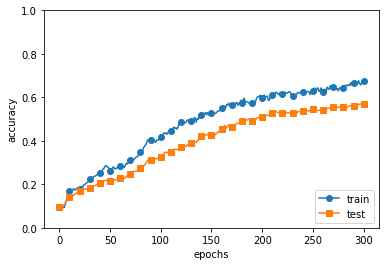

In [ ]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 재현하기 위해 학습 데이터 수를 줄임
x_train = x_train[:300]
t_train = t_train[:300]

# 드롭아웃 사용 유무와 비울 설정 ========================
use_dropout = True  # 드롭아웃을 쓰지 않을 때는 False
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

In [ ]:
6.5 적절한 하이퍼파라미터 값 찾기
6.5.2 하이퍼파라미터 최적화 : 최적 값이 존재할 법한 범위를 점차 좁혀나가

val acc:0.13 | lr:0.00012311804749139173, weight decay:6.050874274200464e-08
val acc:0.07 | lr:1.6355275485832637e-05, weight decay:4.450401117914577e-06
val acc:0.2 | lr:2.980880466103006e-05, weight decay:7.434943456852995e-07
val acc:0.06 | lr:4.220479028530941e-06, weight decay:5.874935927714301e-06
val acc:0.11 | lr:8.782280597761874e-06, weight decay:9.183918434599368e-07
val acc:0.73 | lr:0.00670388494050126, weight decay:2.5620367864915188e-08
val acc:0.09 | lr:0.00012822730644117638, weight decay:2.7810230851613306e-07
val acc:0.15 | lr:3.7268147124921825e-06, weight decay:2.1217502914891594e-08
val acc:0.05 | lr:3.023615480284237e-06, weight decay:3.6392016688997335e-07
val acc:0.18 | lr:2.112062843626648e-05, weight decay:2.7266042998565106e-05
val acc:0.08 | lr:2.6636830735892117e-06, weight decay:4.644220885155666e-06
val acc:0.11 | lr:1.968828359366858e-05, weight decay:3.053805627588017e-05
val acc:0.06 | lr:7.246047859332307e-06, weight decay:3.3896212165257586e-07
val 

Best-13(val acc:0.34) | lr:0.0012475421631106432, weight decay:5.372407649952698e-07
Best-14(val acc:0.29) | lr:0.0013443959141701653, weight decay:8.556084731661616e-06
Best-15(val acc:0.28) | lr:0.0016147584635520097, weight decay:5.048552664189277e-06
Best-16(val acc:0.27) | lr:0.0013421385770043988, weight decay:2.7785176896481103e-08
Best-17(val acc:0.26) | lr:0.0012147077535975249, weight decay:1.2197417852674102e-06
Best-18(val acc:0.24) | lr:0.0015671744103566937, weight decay:1.4810665533201247e-07
Best-19(val acc:0.23) | lr:0.0008358987877213643, weight decay:1.17864394185242e-06
Best-20(val acc:0.22) | lr:0.0008236729197894124, weight decay:7.15894568120532e-06


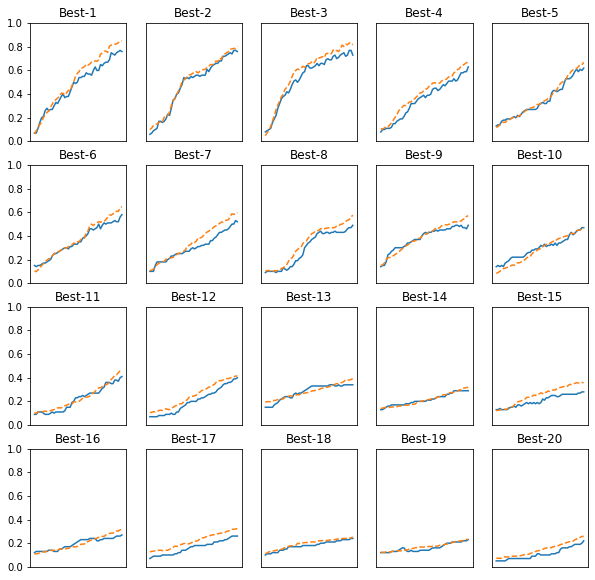

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer
plt.rcParams["figure.figsize"] = (10,10)
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()